# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

In [3]:
import pandas as pd

## imports for Python, Pandas

In [6]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [1]:
%matplotlib inline
from pandas.io.json import json_normalize
import json
import pandas as pd

QUESTION 1

In [2]:
data = json.load((open('data/world_bank_projects.json')))

In [3]:
df = json_normalize(data)      #read to df
df.columns                     #see column names for navigation

Index(['sector', 'supplementprojectflg', 'projectfinancialtype', 'prodline',
       'mjtheme', 'idacommamt', 'impagency', 'project_name', 'mjthemecode',
       'closingdate', 'totalcommamt', 'id', 'mjsector_namecode', 'docty',
       'lendinginstr', 'countrycode', 'totalamt', 'mjtheme_namecode',
       'boardapprovaldate', 'countryshortname', 'prodlinetext',
       'productlinetype', 'regionname', 'status', 'country_namecode',
       'envassesmentcategorycode', 'approvalfy', 'projectdocs',
       'lendprojectcost', 'lendinginstrtype', 'grantamt', 'themecode',
       'borrower', 'sectorcode', 'majorsector_percent', 'board_approval_month',
       'theme_namecode', 'countryname', 'url', 'source',
       'projectstatusdisplay', 'ibrdcommamt', 'sector_namecode',
       'sector1.Percent', 'sector1.Name', 'sector2.Percent', 'sector2.Name',
       'sector4.Percent', 'sector4.Name', 'project_abstract.cdata',
       'theme1.Percent', 'theme1.Name', 'sector3.Percent', 'sector3.Name',
       '_id.

In [4]:
df.project_name.drop_duplicates().count() == len(data) # check each row is unique project  

True

In [5]:
s_country_10 = df.countryname.value_counts().head(10)   #count values by countryname and select top 10
s_country_10

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

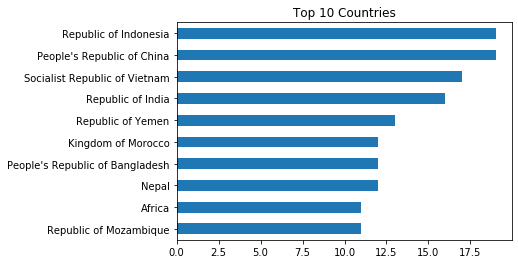

In [6]:
s_country_10.sort_values().plot(kind='barh', title = 'Top 10 Countries')   #plot bar chart of top 10 countries

QUESTION 2

In [7]:
df_theme = json_normalize(data, 'mjtheme_namecode',errors = 'ignore')   #read df for dictionary key of interest
df_theme.head()                                                         #inspect dataframe

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [8]:
s_themes_10 = df_theme.name.value_counts().head(10)   #count values by theme and select top 10
s_themes_10                                           #note missing values '' of 122

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

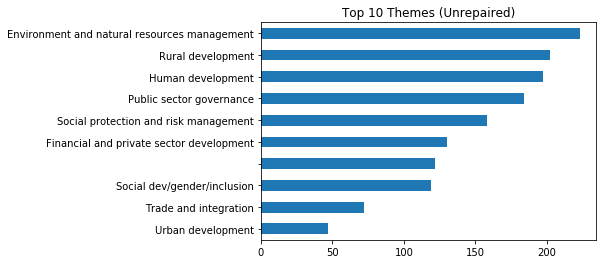

In [12]:
s_themes_10.sort_values().plot(kind='barh', title='Top 10 Themes (Unrepaired)')   #plot bar chart of top 10 themes

QUESTION 3

In [13]:
df_not_empty = df_theme[df_theme.name != ''].copy()            #remove empty name rows for themes dataframe
df_not_empty.drop_duplicates('code', inplace=True)       #drop duplicate codes
df_not_empty.set_index('code', inplace = True)           #reindex to codes
df_not_empty.index = df_not_empty.index.astype(int)      #convert index to integer
df_not_empty.sort_index()                                #order index (not strictly required but too annoying to leave!)

,name
code,
1,Economic management
2,Public sector governance
3,Rule of law
4,Financial and private sector development
5,Trade and integration
6,Social protection and risk management
7,Social dev/gender/inclusion
8,Human development
9,Urban development


In [14]:
code2name_dict = df_not_empty.to_dict()['name']  #convert df codes / names to dictionary

In [17]:
df_theme.name = df_theme.code.apply(lambda x: code2name_dict[int(x)])  #map from code to name using dict and lambda function
df_theme.head()                                                        #inspect dataframe / compare to line 7

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


Question 2 Revisited (Update top 10 after repairing missing names)

In [18]:
s1_themes_10 = df_theme.name.value_counts().head(10)    #count values by theme and select top 10
s1_themes_10

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

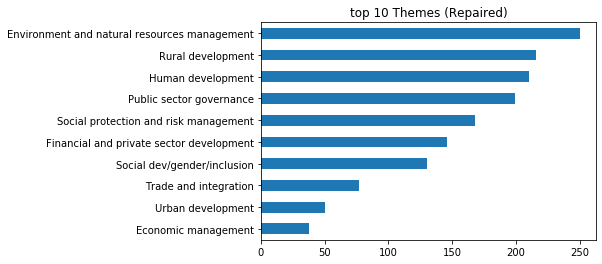

In [19]:
s1_themes_10.sort_values().plot(kind='barh', title='top 10 Themes (Repaired)')   #plot repaired bar chart of top 10 themes